<a href="https://colab.research.google.com/github/jufochoa/ML-Geociencias/blob/main/Trabajo/ML_en_Geociencias_1_An%C3%A1lisis_Clasificacion_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.PRESENTACION

En el cálculo del transporte de sedimentos a partir de mediciones del campo de flujo se tienen diferentes problemas asociados a: las características del lecho, la disponibilidad del sedimento,además de problemas de escala. Los datos usados corresponden a la base de datos presentada por Brownlie (1981), la cual se compone de 7099 datos 
datos, a partir de 1887 mediciones en ríos naturales y 5212 mediciones en canales de laboratorio. Las variables involucradas en dichas mediciones son:

- Caudal,Q(L/s) - Variable numérica
- Ancho,B (m)   - Variable numérica
- Profundidad de flujo,y (m)  - Variable numérica
- Pendiente del cauce,S(S*1000)  - Variable numérica
- Tamaño medio de los sedimentos del fondo,D50(mm)  - Variable numérica
- Gradación,G (Adim.)  - Variable numérica
- Gravedad específica,Ss(Adim.)  - Variable numérica
- Concentración,C (ppm)  - Variable numérica
- Temperatura, T(C) - Variable numérica
- Forma del Lecho,FL - Variable categórica: 0 - No se observa, 1 - Lecho plano previo a inicio del movimiento, 2 - Rizos, 3 - Dunas, 4 - Lecho en Transición, 5- Lecho plano, 6 Ondas permanenentes, 7- Antidunas,  8 Rápidos y pozos.




Se analiza en este notebook un problema de clasificación con una variable categórica muticlase creada a partir de los datos y que corresponde a la variable**Tipo**, la cual hace referencia a la intensidad del transporte de sedimento según la clasificación propuesta por Gomez & Soar (2020), con dos categorías: 1-Transporte ilimitado y 0 - Transporte restringido.


# 1.ANÁLISIS EXPLORATORIO

In [1]:
#Instalación de bibliotecas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Cargue de datos al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargue de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [4]:
#Carga de datos
from google.colab import drive
dcrudos=pd.read_excel("/content/drive/MyDrive/ML/BDSedimentos.xlsx")

dcrudos.head(6)
dcrudos.tail(6)

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C,Nombre,Tipo
7021,31,0.0300,0.5,0.122,1.66,0.18,3.3,2.65,-1.0,3,150.0,ZNA,Laboratorio
7022,32,0.0300,0.5,0.115,1.80,0.18,3.3,2.65,-1.0,3,500.0,ZNA,Laboratorio
7023,33,0.0298,0.5,0.092,3.50,0.18,3.3,2.65,-1.0,6,1007.0,ZNA,Laboratorio
7024,34,0.0304,0.5,0.086,2.07,0.18,3.3,2.65,-1.0,5,1975.0,ZNA,Laboratorio
7025,35,0.0185,0.5,0.040,8.00,0.18,3.3,2.65,-1.0,7,3240.0,ZNA,Laboratorio
7026,36,0.0092,0.5,0.082,2.79,0.18,3.3,2.65,-1.0,3,272.0,ZNA,Laboratorio


In [5]:
#Resumen estadístico de los datos
pd.set_option('display.width',100)
pd.set_option('precision',3)
dcrudos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,7027.000,7.027e+03,7027.000,7027.000,7027.000,7027.000,7027.00,7027.000,7027.000,7027.000,7027.000
mean,132.922,2.850e+02,38.864,0.791,3.445,1.651,1.54,2.589,13.991,1.669,2065.247
std,168.739,1.700e+03,122.616,1.952,5.135,4.295,2.39,0.287,12.101,2.074,5635.029
min,1.000,3.300e-05,0.070,0.008,-1.000,-10.000,-1.00,1.030,-1.000,0.000,-1.000
25%,25.000,1.505e-02,0.354,0.067,0.820,0.305,1.13,2.650,-1.000,0.000,66.888
50%,70.000,3.877e-02,0.753,0.143,1.500,0.506,1.34,2.650,16.500,0.000,248.000
75%,177.000,6.242e-01,2.438,0.360,4.000,1.349,1.63,2.650,23.000,3.000,1460.500
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.10,4.220,262.000,8.000,111000.000


Se observan valores negativos en las variables **Pendiente(S), D50, Gradación (G), Concentración(C)** y **Temperatura(T)**, que se deben eliminar de la base de datos

In [6]:
# Conformación de un nuevo conjnto de datos eliminando los valores negativos
dcrudos_F1=dcrudos[(dcrudos["T"]>4)  & (dcrudos["C"]>0) & (dcrudos["G"]>0) & (dcrudos["S"]>0) ]
dcrudos_F1.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,4601.000,4.601e+03,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000
mean,92.433,4.077e+02,51.750,0.998,2.135,1.546,1.711,2.564,20.428,1.295,1232.276
std,84.529,2.068e+03,144.970,2.279,3.406,4.105,2.901,0.327,8.661,1.840,5348.060
min,1.000,3.300e-05,0.076,0.009,0.003,0.011,0.405,1.030,4.260,0.000,0.003
25%,22.000,1.622e-02,0.381,0.077,0.720,0.286,1.210,2.650,15.800,0.000,65.000
50%,63.000,5.219e-02,0.819,0.160,1.100,0.620,1.440,2.650,20.800,0.000,183.000
75%,147.000,1.184e+01,35.000,0.506,2.000,1.349,1.750,2.650,25.420,3.000,590.828
max,330.000,2.883e+04,1109.472,17.282,36.700,76.113,100.100,2.700,262.000,7.000,111000.000


Eliminando los valores negativos en toda la base de datos, el tamaño pasa de 7027 filas a 4601, es decir, se pierden 2426 (34,5% de los datos). Por lo que se busca cual es la variable que mas datos negativos tiene, encontrando que es la **Temperatura** y mejor se elimina esta variable de la base de datos.

In [7]:
#Se elimina la columna de temperatura
bdatos=dcrudos.drop(['T'],axis=1)

In [8]:
#Resumen estadístico de los datos sin la temperatura
bdatos=bdatos[(bdatos["C"]>0) & (bdatos["G"]>0) & (bdatos["S"]>0) ]
bdatos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,FL,C
count,6641.000,6.641e+03,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000
mean,137.721,2.880e+02,37.050,0.740,3.583,1.674,1.598,2.590,1.717,2171.676
std,171.753,1.738e+03,124.111,1.958,5.212,4.253,2.430,0.287,2.098,5776.226
min,1.000,3.300e-05,0.070,0.008,0.003,0.011,0.405,1.030,0.000,0.001
25%,26.000,1.416e-02,0.305,0.065,0.890,0.320,1.150,2.650,0.000,78.300
50%,75.000,3.709e-02,0.736,0.133,1.500,0.536,1.350,2.650,0.000,273.700
75%,185.000,3.834e-01,2.438,0.319,4.299,1.349,1.650,2.650,3.000,1640.000
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.100,4.220,8.000,111000.000


Se pasa entonces a una base de datos con 6641 observaciones, donde se se eliminaron 386 datos(5,5% de los registros originales)

In [9]:
bdatos

,Medición,Q,B,Y,S,D50,G,Ss,FL,C,Nombre,Tipo
0,1,0.036,0.305,0.131,2.50,0.105,1.27,2.65,0,6600.0,ABA,Laboratorio
1,2,0.036,0.305,0.140,2.20,0.105,1.27,2.65,0,4300.0,ABA,Laboratorio
2,3,0.028,0.305,0.119,2.30,0.105,1.27,2.65,0,7000.0,ABA,Laboratorio
3,4,0.028,0.305,0.131,1.70,0.105,1.27,2.65,0,4500.0,ABA,Laboratorio
4,5,0.025,0.305,0.119,2.10,0.105,1.27,2.65,0,4700.0,ABA,Laboratorio
...,...,...,...,...,...,...,...,...,...,...,...,...
7022,32,0.030,0.500,0.115,1.80,0.180,3.30,2.65,3,500.0,ZNA,Laboratorio
7023,33,0.030,0.500,0.092,3.50,0.180,3.30,2.65,6,1007.0,ZNA,Laboratorio
7024,34,0.030,0.500,0.086,2.07,0.180,3.30,2.65,5,1975.0,ZNA,Laboratorio
7025,35,0.018,0.500,0.040,8.00,0.180,3.30,2.65,7,3240.0,ZNA,Laboratorio


In [20]:
BDCBXY=bdatos.drop(['Medición','Tipo','Nombre','FL'],axis=1)
BDCBXY

,Q,B,Y,S,D50,G,Ss,C
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0
...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0


In [21]:
#Cálculo de la variable (ib) que permite crear la clase binaria
BDCBXY['ib']=BDCBXY['Q']*(BDCBXY['S']/1000)*0.28/(364*((BDCBXY['Ss']-1)*9.81*(BDCBXY['D50']/1000))**1.5)
BDCBXY

,Q,B,Y,S,D50,G,Ss,C,ib
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0,9.758e-04
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0,8.652e-04
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0,7.166e-04
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0,5.136e-04
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0,5.728e-04
...,...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0,2.641e-04
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0,5.102e-04
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0,3.078e-04
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0,7.239e-04


In [23]:
#Condicional pra asignar el valor del tipo
BDCBXY.loc[BDCBXY['ib'] > 0.0001,'Tipo']='1'
BDCBXY.loc[BDCBXY['ib'] < 0.0001,'Tipo']='0'
BDCBXY

,Q,B,Y,S,D50,G,Ss,C,ib,Tipo
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0,9.758e-04,1
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0,8.652e-04,1
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0,7.166e-04,1
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0,5.136e-04,1
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0,5.728e-04,1
...,...,...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0,2.641e-04,1
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0,5.102e-04,1
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0,3.078e-04,1
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0,7.239e-04,1


In [24]:
#Revisión de datos faltantes
BDCBXY.isna().any()

Q       False
B       False
Y       False
S       False
D50     False
G       False
Ss      False
C       False
ib      False
Tipo    False
dtype: bool

In [25]:
#Resumen de datos
BDCBXY.dtypes

Q       float64
B       float64
Y       float64
S       float64
D50     float64
G       float64
Ss      float64
C       float64
ib      float64
Tipo     object
dtype: object

In [26]:
#cantidad de variables en cada grupo de variables
BDCBXY.groupby('Tipo').size()

Tipo
0    3526
1    3115
dtype: int64

Se revisa cuantos elementos hay en cada clase : Tipo 0(53,1%) y Tipo 1(46,9%).

In [28]:
#Valores de X y Y para el problema
BDCBX=BDCBXY.drop(['ib','Tipo'],axis=1)
BDCBX

,Q,B,Y,S,D50,G,Ss,C
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,6600.0
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,4300.0
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,7000.0
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,4500.0
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,4700.0
...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,500.0
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1007.0
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,1975.0
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,3240.0


In [29]:
BDCBY=BDCBXY.filter(['Tipo'])
BDCBY

,Tipo
0,1
1,1
2,1
3,1
4,1
...,...
7022,1
7023,1
7024,1
7025,1


# 2.APRENDIZAJE NO SUPERVISADO (CLASIFICACION BINARIA) - VARIABLE 'Tipo'

La Variable tipo toma valores de 0 o 1, según la intensidad en el transporte de sedimentos: Transporte restringido:0 y Transporte ilimitado:1

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###Accuracy

In [33]:
# Comparación de modelos
#métrica accuracy

models=[]
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('k-NN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

results=[]
names=[]
scoring='accuracy'
for name,model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDCBX,BDCBY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LoR:88.30%(8.81


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA:75.47%(15.62


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

k-NN:77.31%(12.30
CART:92.44%(4.54
NB:76.19%(20.03


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM:76.49%(11.65


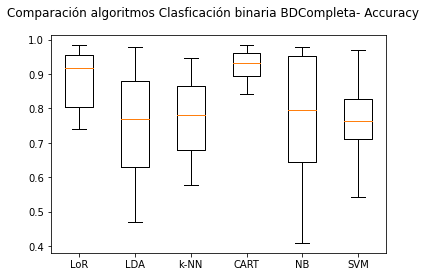

<Figure size 432x288 with 0 Axes>

In [34]:
#Comparación gráfica

#plt.figure(figsize=(20,20))
fig=plt.figure()
fig.suptitle("Comparación algoritmos Clasficación binaria BDCompleta- Accuracy")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos Clasficación binaria BDCompleta- Accuracy.jpg")

###ROC AUC

In [35]:
# Comparación de modelos
#métrica roc auc

models=[]
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('k-NN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

results=[]
names=[]
scoring='roc_auc'
for name,model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDCBX,BDCBY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LoR:93.63%(5.13


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA:89.66%(7.59


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

k-NN:80.38%(14.13
CART:90.17%(5.79
NB:85.60%(9.73


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM:82.75%(10.52


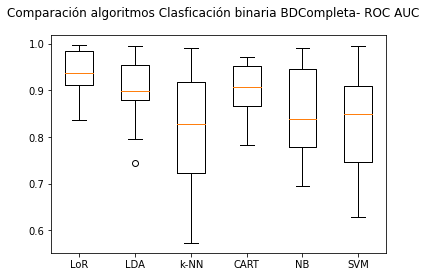

<Figure size 432x288 with 0 Axes>

In [36]:
#Comparación gráfica

#plt.figure(figsize=(20,20))
fig=plt.figure()
fig.suptitle("Comparación algoritmos Clasficación binaria BDCompleta- ROC AUC")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos Clasficación binaria BDCompleta- ROC AUC.jpg")

#3.DETALLE DE MÉTODOS DE CLASIFICACIÓN

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
BDCBY

##3.1 Regresión Logística

In [49]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1033
           1       0.93      0.81      0.86       960

    accuracy                           0.88      1993
   macro avg       0.89      0.88      0.88      1993
weighted avg       0.88      0.88      0.88      1993



##3.2 Análisis discriminante Lineal

In [51]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=LinearDiscriminantAnalysis()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      1033
           1       0.96      0.50      0.66       960

    accuracy                           0.75      1993
   macro avg       0.82      0.74      0.73      1993
weighted avg       0.81      0.75      0.73      1993



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##3.3KNN

In [52]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=KNeighborsClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1033
           1       0.82      0.74      0.78       960

    accuracy                           0.80      1993
   macro avg       0.80      0.79      0.79      1993
weighted avg       0.80      0.80      0.79      1993



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##3.4 Decision Tree Classifier (CART)

In [53]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1033
           1       0.97      0.97      0.97       960

    accuracy                           0.97      1993
   macro avg       0.97      0.97      0.97      1993
weighted avg       0.97      0.97      0.97      1993



##3.5 Naive Bayes

In [54]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=GaussianNB()
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1033
           1       0.98      0.48      0.64       960

    accuracy                           0.74      1993
   macro avg       0.82      0.73      0.72      1993
weighted avg       0.82      0.74      0.72      1993



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##3.6 SupportVectorClassifier (SVC)

In [55]:
test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(BDCBX,BDCBY,test_size=test_size,random_state=seed)
model=SVC(gamma='auto')
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_BDCB=classification_report(Ytest,predicted)
print(RC_BDCB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1033
           1       0.78      0.85      0.81       960

    accuracy                           0.81      1993
   macro avg       0.81      0.81      0.81      1993
weighted avg       0.81      0.81      0.81      1993



# 3.2 Tratamiento de datos (Feature Selection y Feature Importance) - Métricas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

### Accuracy

In [ ]:
# Usando método de regresión logística

kfold=KFold(n_splits=10)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
scoring_ANSB_RL='accuracy'

Acc_ANSB_RL=cross_val_score(model,ANSB_X,ANSB_Y,cv=kfold,scoring=scoring_ANSB_RL)
print(Acc_ANSB_RL)
print(f"AUC:{Acc_ANSB_RL.mean()*100.0:,.2f}% ({Acc_ANSB_RL.std()*100.0:,.2f}%)")

[0.997 0.881 0.88  0.905 0.983 0.875 0.989 0.962 0.95  0.982]
AUC:94.05% (4.75%)


In [ ]:
# Usando método de random forest

kfold = KFold(n_splits=10)
model = RandomForestClassifier()

Acc_ANSB_RF= cross_val_score(model, ANSB_X,ANSB_Y, cv=kfold, scoring='accuracy')
print(Acc_ANSB_RF)
print(f"Accuracy:{Acc_ANSB_RF.mean()*100.0:,.2f}% ({Acc_ANSB_RF.std()*100.0:,.2f}%)")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:100.00% (0.00%)


### Logarithmic Loss

In [ ]:
LL_ANSB = cross_val_score(model,ANSB_X,ANSB_Y, cv=kfold, scoring='neg_log_loss')
print(LL_ANSB)
print(f"Accuracy:{LL_ANSB.mean()*100.0:,.2f}% ({LL_ANSB.std()*100.0:,.2f}%)")

[-0.044 -0.339 -0.227 -0.177 -0.137 -0.688 -0.065 -0.167 -0.112 -0.081]
Accuracy:-20.38% (18.12%)


## Matriz de confusión

In [ ]:
# Con Regresión logística

from sklearn.metrics import confusion_matrix

test_size=0.3
seed=7
Xtrain,Xtest,Ytrain,Ytest=train_test_split(ANSB_X,ANSB_Y,test_size=test_size,random_state=seed)

model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(Xtrain,Ytrain)
YTrain_pred=model.predict(Xtest)
mat_con_ANSB=confusion_matrix(Ytest,YTrain_pred)
print(mat_con_ANSB)
#[VP FN;FP VN ]

[[1004   38]
 [  73  878]]


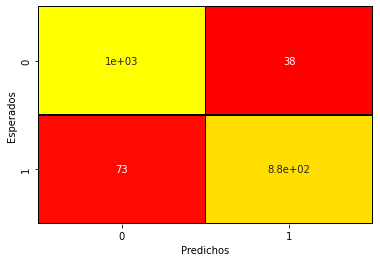

In [ ]:
import seaborn as sns
sns.heatmap(mat_con_ANSB, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.autumn)
plt.xlabel('Predichos')
plt.ylabel('Esperados')
plt.show()

## Curva ROC

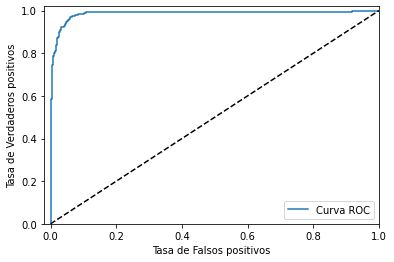

In [ ]:
from sklearn.metrics import roc_curve

probs=model.predict_proba(Xtest)
Ypred_proba = probs[:,1]

fpr,tpr,threshold=roc_curve(Ytest,Ypred_proba)
plt.plot(fpr,tpr, label='Curva ROC')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.legend(loc=4);

In [ ]:
# Método de regresion logística

kfold=KFold(n_splits=10)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
scoring_ANSB='roc_auc'
result_vc_roc=cross_val_score(model,ANSB_X,ANSB_Y,cv=kfold,scoring=scoring_ANSB)

print(result_vc_roc)
print(f"AUC:{result_vc_roc.mean()*100.0:,.2f}% ({result_vc_roc.std()*100.0:,.2f}%)")

[0.999 0.933 0.99  0.982 0.99  0.966 0.999 0.992 0.992 0.958]
AUC:98.02% (2.04%)


In [ ]:
# Usando método de random forest
kfold = KFold(n_splits=10)
model = RandomForestClassifier()

Acc_ANSB_RF= cross_val_score(model, ANSB_X,ANSB_Y, cv=kfold, scoring='accuracy')
print(Acc_ANSB_RF)
print(f"Accuracy:{Acc_ANSB_RF.mean()*100.0:,.2f}% ({Acc_ANSB_RF.std()*100.0:,.2f}%)")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:100.00% (0.00%)


## Reporte de clasificación

In [ ]:
# Viene de clasificación logística

test_size=0.3
seed=1
Xtrain, Xtest, Ytrain,Ytest=train_test_split(ANSB_X,ANSB_Y,test_size=test_size,random_state=seed)
model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(Xtrain,Ytrain)
predicted=model.predict(Xtest)
RC_ANSB=classification_report(Ytest,predicted)
print(RC_ANSB)

# Precision=(TP/(TP+FP)) - Recall=(TP/(TP+FP)) - F1=(2Precisionx Recall/(Precision+Recall))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1033
           1       0.97      0.92      0.94       960

    accuracy                           0.95      1993
   macro avg       0.95      0.95      0.95      1993
weighted avg       0.95      0.95      0.95      1993



## Bias-Variance_TradeOff

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Con regresión lineal

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)

train_score=lr.score(Xtrain,Ytrain)
test_score=lr.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)


Train score: 0.28594956171592534
Test score: 0.24580989559130673


In [ ]:
# Con KNeighbors
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

train_score=kn.score(Xtrain,Ytrain)
test_score=kn.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6069304371391049
Test score: 0.6152590351726364


In [ ]:
# Con regresión logística

from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression(solver='lbfgs',max_iter=1000)
lgr.fit(Xtrain,Ytrain)

train_score=lgr.score(Xtrain,Ytrain)
test_score=lgr.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.9485800344234079
Test score: 0.9478173607626693


In [ ]:
# Con Random Forest

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(Xtrain,Ytrain)

train_score=rf.score(Xtrain,Ytrain)
test_score=rf.score(Xtest,Ytest)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 1.0
Test score: 1.0


Tanto con el modelo lineal se obtiene un ajuste muy pobre, que mejora con el modelo KNeighbors, indicando que ambos ajustes tienen problema de sesgo. Con el modelo de regresión logística se obtiene un buen ajuste y con el de random forest se obtiene el mejor modelo.

## Curva de ajuste

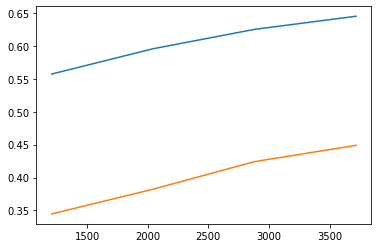

In [ ]:
# Para KNeighbors
from sklearn.model_selection import learning_curve

lc_KN = learning_curve(KNeighborsRegressor(n_neighbors=5),Xtrain,Ytrain,cv=5)
samples_KN, train, test = lc_KN[0], lc_KN[1], lc_KN[2]

plt.plot(samples_KN[1:],np.mean(train,axis=1)[1:])
plt.plot(samples_KN[1:],np.mean(test,axis=1)[1:]);

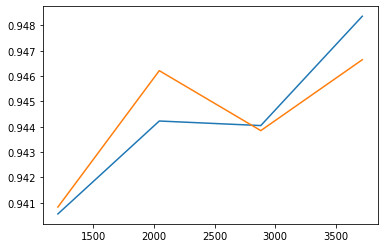

In [ ]:
# Para regresión logística

lc_RL = learning_curve(LogisticRegression(solver='lbfgs',max_iter=1000),Xtrain,Ytrain,cv=5)
samples_RL, train, test = lc_RL[0], lc_RL[1], lc_RL[2]

plt.plot(samples_RL[1:],np.mean(train,axis=1)[1:])
plt.plot(samples_RL[1:],np.mean(test,axis=1)[1:]);

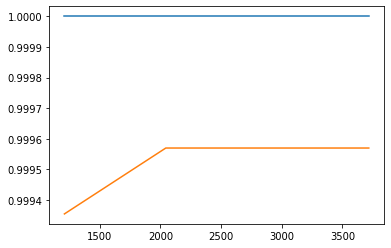

In [ ]:
# Para Random Forest

lc_RF = learning_curve(RandomForestClassifier(),Xtrain,Ytrain,cv=5)
samples_RF, train, test = lc_RF[0], lc_RF[1], lc_RF[2]

plt.plot(samples_RF[1:],np.mean(train,axis=1)[1:])
plt.plot(samples_RF[1:],np.mean(test,axis=1)[1:]);

# 3.3 Modelación de datos

## Análisis de componentes principales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#Conjuntos de datos:ANSB_X_est, ANSB_X_norm,ANSB_X_resc. Se varían para analizar

In [ ]:
#Analisis de componentes principales
n = len(ANSB_X_resc[1])  # número de features
acp_ANSB_X_resc = PCA(n_components=n).fit(ANSB_X_resc)

print(acp_ANSB_X_resc.components_)

[[ 0.322  0.653  0.665 -0.04  -0.019  0.016  0.05  -0.035  0.013  0.148]
 [-0.03  -0.029 -0.022  0.067  0.001 -0.011  0.994  0.066  0.004 -0.011]
 [-0.023 -0.075  0.089 -0.013  0.902  0.021  0.027 -0.412 -0.023 -0.012]
 [ 0.087  0.016  0.018  0.377  0.39  -0.004 -0.077  0.831  0.03   0.03 ]
 [-0.025 -0.641  0.513 -0.043 -0.08   0.078 -0.002  0.037  0.109  0.546]
 [ 0.444  0.137 -0.499  0.172  0.019 -0.12   0.011 -0.152  0.077  0.679]
 [ 0.762 -0.367  0.096  0.206 -0.076 -0.104  0.003 -0.112 -0.132 -0.432]
 [-0.326  0.04   0.159  0.808 -0.129 -0.336 -0.044 -0.28  -0.064  0.007]
 [ 0.024  0.035 -0.053  0.348 -0.065  0.924 -0.004 -0.125 -0.005 -0.012]
 [ 0.042  0.004 -0.002  0.062 -0.001 -0.03  -0.005 -0.061  0.979 -0.175]]


In [ ]:
print(f"Varianza explicada:{acp_ANSB_X_resc.explained_variance_}")
print(f"Relación de Varianza explicada:{acp_ANSB_X_resc.explained_variance_ratio_}")

Varianza explicada:[0.027 0.008 0.003 0.003 0.002 0.001 0.001 0.001 0.001 0.   ]
Relación de Varianza explicada:[0.587 0.173 0.07  0.062 0.037 0.023 0.018 0.013 0.012 0.005]


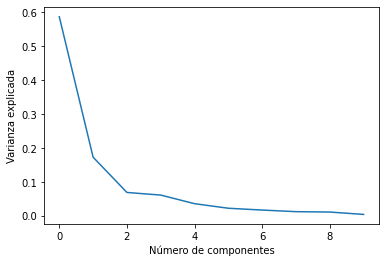

In [ ]:
#Gráfico de varianza explicada
plt.plot(acp_ANSB_X_resc.explained_variance_ratio_)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

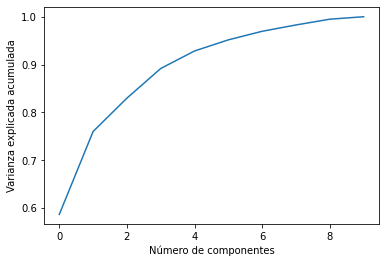

In [ ]:
#Gráfico de varianza acumulada
plt.plot(np.cumsum(acp_ANSB_X_resc.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [ ]:
acp_samples = acp_ANSB_X_resc.transform(ANSB_X_resc) # Transformación en el nuevo espacio dimensional

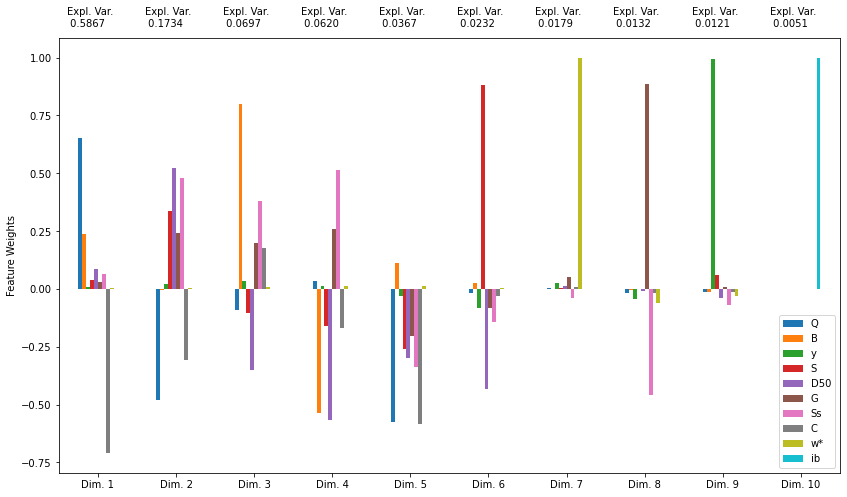

In [ ]:
# Gráfico de aporte de variable a cada componente

def acp_ANSB_X_resc_results(ANSB_X_resc,acp_ANSB_X_resc):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(acp_ANSB_X_est .components_)+1)]
    
    components = pd.DataFrame(np.round(acp_ANSB_X_est .components_, 4), columns = ANSB_X.keys()) 
    components.index = dimensions

    ratios = acp_ANSB_X_resc.explained_variance_ratio_.reshape(len(acp_ANSB_X_resc.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(acp_ANSB_X_resc.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

acp_ANSB_X_resc_results = acp_ANSB_X_resc_results(ANSB_X_est, acp_ANSB_X_resc)

In [ ]:
print(acp_ANSB_X_resc_results.cumsum())

         Explained Variance      Q      B      y      S    D50      G     Ss      C     w*  \
Dim. 1                0.587  0.652  0.239  0.008  0.040  0.088  0.032  0.063 -0.710  0.003   
Dim. 2                0.760  0.172  0.232  0.031  0.375  0.609  0.275  0.545 -1.016  0.006   
Dim. 3                0.830  0.079  1.032  0.063  0.269  0.259  0.475  0.926 -0.838  0.014   
Dim. 4                0.892  0.114  0.494  0.077  0.111 -0.309  0.733  1.441 -1.007  0.028   
Dim. 5                0.928 -0.463  0.606  0.048 -0.148 -0.607  0.528  1.102 -1.591  0.039   
Dim. 6                0.952 -0.483  0.632 -0.034  0.735 -1.038  0.446  0.959 -1.622  0.043   
Dim. 7                0.970 -0.477  0.630 -0.007  0.738 -1.025  0.498  0.921 -1.612  1.040   
Dim. 8                0.983 -0.494  0.628 -0.049  0.736 -1.036  1.383  0.461 -1.632  0.978   
Dim. 9                0.995 -0.505  0.613  0.945  0.798 -1.074  1.389  0.390 -1.643  0.949   
Dim. 10               1.000 -0.506  0.613  0.946  0.798 -1.0

In [ ]:
#Gráfico biplot - Falta

xvector = acp_ANSB_X_resc.components_[0] 
yvector = acp_ANSB_X_resc.components_[1]

xs = acp_ANSB_X_resc.transform(ANSB_X_est)[:,0] 
ys = acp_ANSB_X_resc.transform(ANSB_X_est)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(ANSB_X.columns.values)[i], color='r') 

for c, i, bdatosANSB_Y in zip("rgb", [0, 1], ANSB_X.columns):
   plt.scatter(acp_samples[y==i,0], acp_samples[y==i,1], c=c)
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(ANSB_X.columns, fontsize=8)
plt.show()

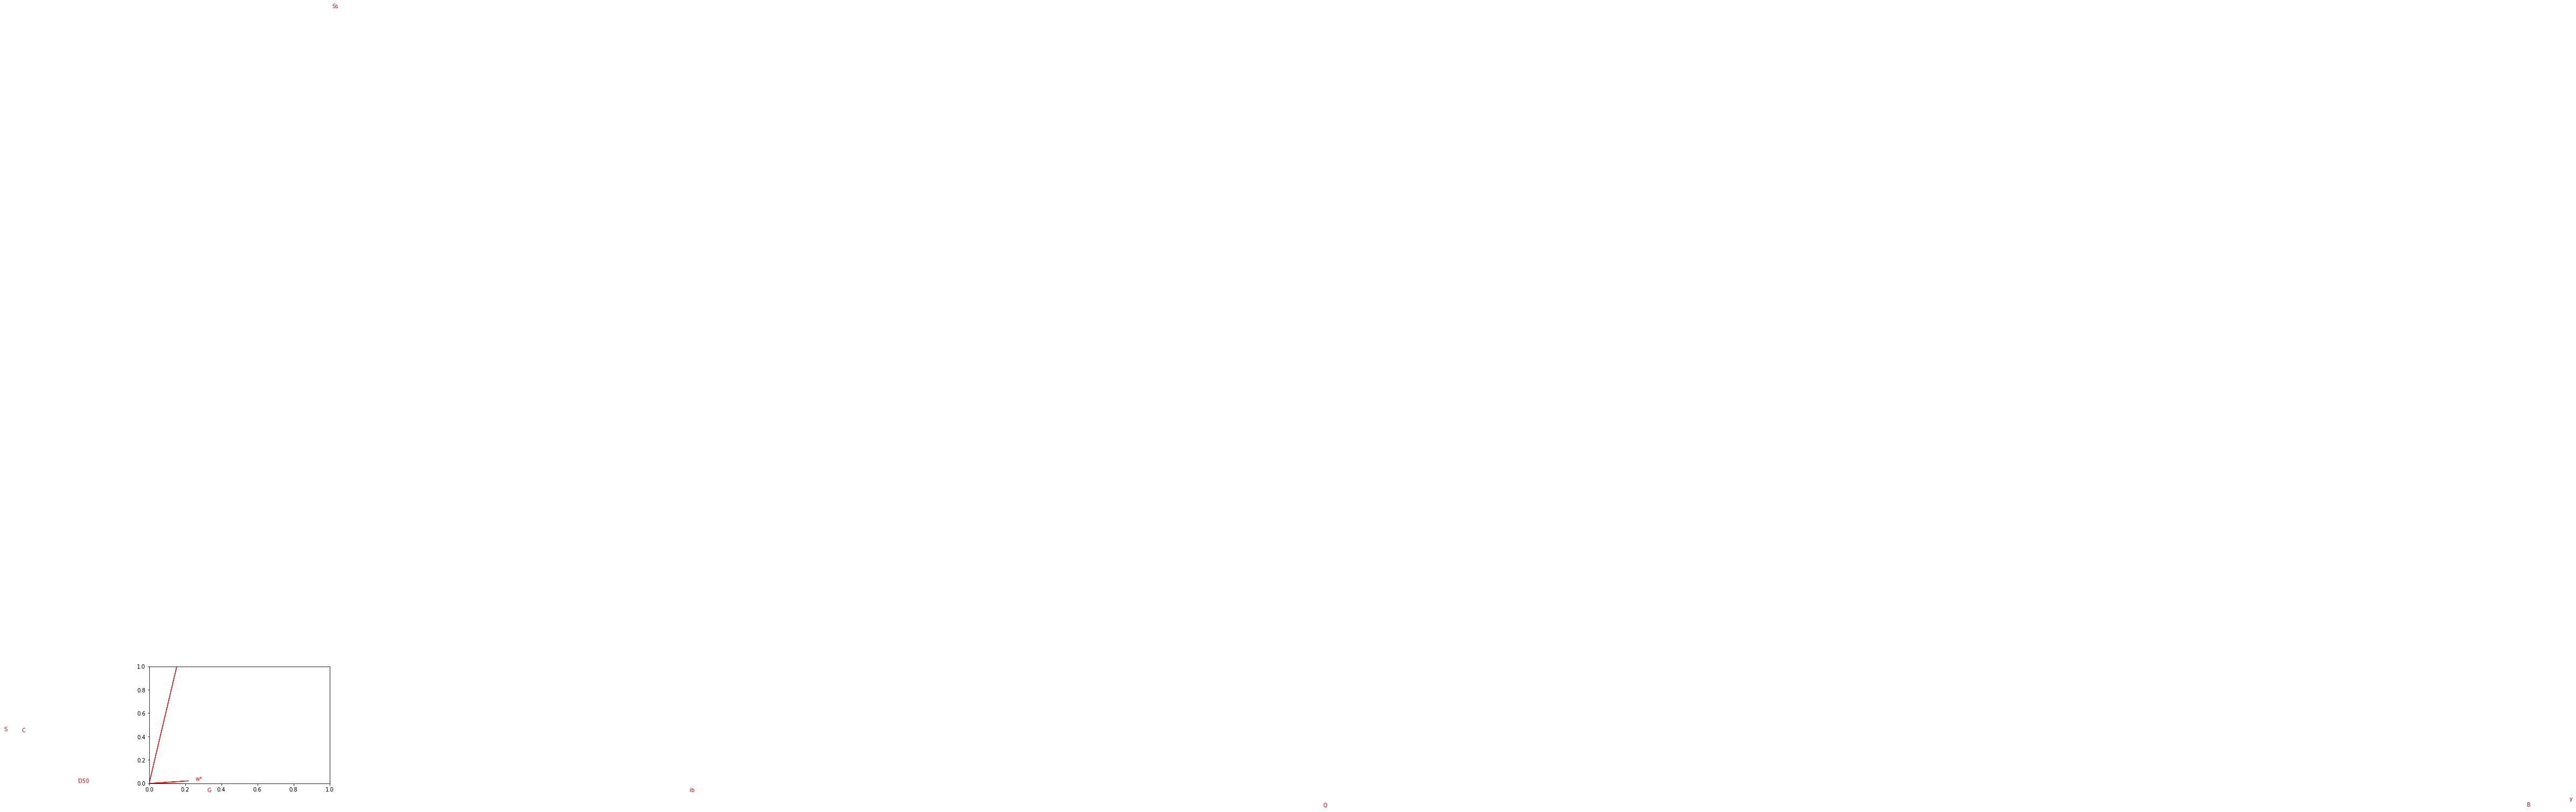

In [ ]:
xvector = acp_ANSB_X_resc.components_[0] 
yvector = acp_ANSB_X_resc.components_[1]

xs = acp_ANSB_X_resc.transform(ANSB_X_est)[:,0] 
ys = acp_ANSB_X_resc.transform(ANSB_X_est)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función:
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(ANSB_X.columns.values)[i], color='r')

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


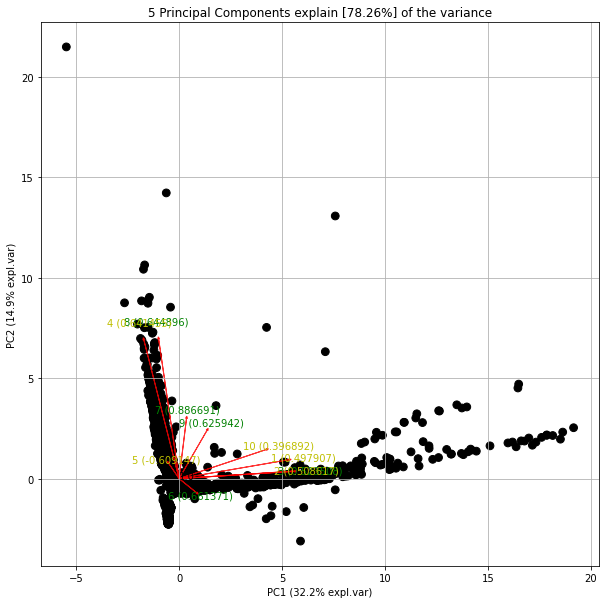

In [ ]:
# Gráfico biplot alterno (https://colab.research.google.com/github/erdogant/pca/blob/master/notebooks/pca_examples.ipynb#scrollTo=8tMFZEZXsSrs)

from sklearn.decomposition import PCA
from pca import pca
import numpy as np
import pandas as pd

model = pca(n_components=5, normalize=True)
out = model.fit_transform(ANSB_X_resc)

fig, ax = model.biplot(label=True, legend=False, figsize=(10, 10))

[pca] >Plot PC1 vs PC2 with loadings.


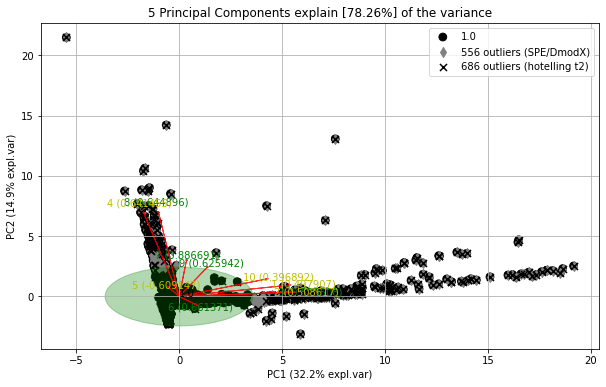

In [ ]:
fig, ax = model.biplot(SPE=True, hotellingt2=True, figsize=(10, 6))

## Análisis Cluster

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

### Modelo Cluster

In [ ]:
km = KMeans(n_clusters=3)
model=km.fit(ANSB_X)
y_kmeans=model.fit_predict(ANSB_X)

In [ ]:
centroids = model.cluster_centers_
print(centroids)
print(f"Número de datos asignados a cada centroide:{np.bincount(y_kmeans)}")


[[3.132e+02 4.017e+01 7.961e-01 2.739e+00 1.757e+00 1.625e+00 2.584e+00
  9.102e+02 8.557e-01 9.031e-02]
 [1.209e+00 1.204e+00 8.052e-02 1.366e+01 7.492e-01 1.251e+00 2.654e+00
  1.434e+04 1.661e+00 2.786e-03]
 [1.191e-01 7.187e-01 1.587e-01 5.652e+00 1.676e-01 2.061e+00 2.652e+00
  6.183e+04 1.093e+01 6.516e-03]]
Número de datos asignados a cada centroide:[6109  506   26]


### Cluster Jerárquico

In [ ]:
from scipy.spatial import distance_matrix

dd1_ANSB=pd.DataFrame(distance_matrix(ANSB_X,ANSB_X,p=1))  ##Distancia de Manhattan
dd1_ANSB.head()

,0,1,2,3,4,5,6,7,8,9,...,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640
0,0.000,2300.781,401.324,2102.779,1902.141,3852.674,3852.692,3903.660,4403.343,5403.873,...,6368.874,6096.518,6521.904,6438.866,6456.681,6106.495,5599.178,4631.140,3370.186,6334.499
1,2300.781,0.000,2700.762,202.016,401.378,1551.911,1551.929,1602.898,2102.581,3103.111,...,4068.712,3796.356,4221.139,4138.085,4155.919,3805.732,3299.016,2330.377,1070.023,4034.337
2,401.324,2700.762,0.000,2501.479,2300.817,4251.367,4251.367,4302.336,4802.019,5802.549,...,6767.950,6495.594,6920.606,6837.569,6855.366,6505.174,5998.257,5029.820,3769.261,6733.575
3,2102.779,202.016,2501.479,0.000,200.668,1750.495,1750.913,1801.081,2301.364,3301.494,...,4267.695,3995.339,4419.129,4336.092,4353.907,4003.921,3498.004,2529.107,1269.007,4233.320
4,1902.141,401.378,2300.817,200.668,0.000,1950.551,1950.751,2001.519,2501.202,3501.732,...,4467.533,4195.177,4619.796,4536.759,4554.557,4204.364,3697.847,2729.010,1468.845,4433.158


In [ ]:
dd2_ANSB=pd.DataFrame(distance_matrix(ANSB_X,ANSB_X,p=2))  ##Distancia Euclidiana
dd2_ANSB.head()

,0,1,2,3,4,5,6,7,8,9,...,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640
0,0.000,2300.000,400.002,2100.001,1900.001,3850.001,3850.001,3900.001,4400.001,5400.001,...,6362.001,6090.002,6514.971,6432.001,6450.001,6100.001,5593.001,4625.002,3360.006,6328.001
1,2300.000,0.000,2700.000,200.006,400.002,1550.001,1550.001,1600.002,2100.001,3100.001,...,4062.002,3790.002,4214.972,4132.002,4150.002,3800.002,3293.002,2325.003,1060.019,4028.002
2,400.002,2700.000,0.000,2500.000,2300.000,4250.000,4250.000,4300.000,4800.000,5800.000,...,6762.001,6490.001,6914.971,6832.001,6850.001,6500.001,5993.001,5025.001,3760.005,6728.001
3,2100.001,200.006,2500.000,0.000,200.001,1750.000,1750.000,1800.000,2300.000,3300.000,...,4262.001,3990.001,4414.971,4332.001,4350.001,4000.001,3493.001,2525.001,1260.017,4228.001
4,1900.001,400.002,2300.000,200.001,0.000,1950.000,1950.000,2000.000,2500.000,3500.000,...,4462.001,4190.001,4614.971,4532.001,4550.001,4200.001,3693.001,2725.001,1460.013,4428.001


In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

Z_ANSB=linkage(ANSB_X,method='ward',metric='euclidean') # matriz Z con todos los enlaces creados

In [ ]:
Z_ANSB

array([[4.530e+02, 4.730e+02, 0.000e+00, 2.000e+00],
       [1.848e+03, 1.943e+03, 0.000e+00, 2.000e+00],
       [1.847e+03, 1.942e+03, 0.000e+00, 2.000e+00],
       ...,
       [1.327e+04, 1.328e+04, 1.934e+05, 5.100e+02],
       [1.327e+04, 1.328e+04, 3.211e+05, 5.250e+02],
       [1.328e+04, 1.328e+04, 4.933e+05, 6.641e+03]])

In [ ]:
#Cálculo del coeficiente de Cophenet
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

C, coph_dist=cophenet(Z_ANSB,pdist(ANSB_X)) #Coeficiente de Cophenet
C

0.6998151614012189

Se obtiene un valor del coeficiente de Cophenet de 0.7 (el valor óptimo es 1)

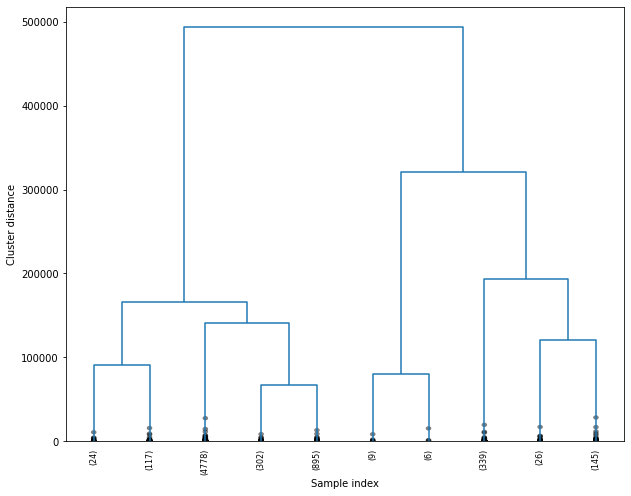

In [ ]:
# Gráfico del Dendrograma
plt.figure(figsize=(10,8))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z_ANSB,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=10,show_leaf_counts=True,show_contracted=True)
plt.show()

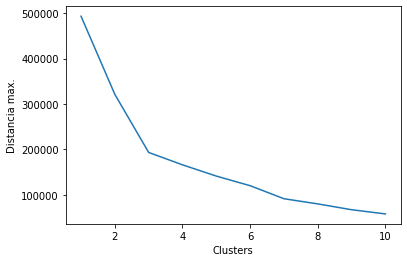

In [ ]:
#Gráfico del codo
last=Z_ANSB[-10:,2]
last_rev=last[::-1] #e voltean
idx=np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
plt.xlabel('Clusters')
plt.ylabel('Distancia max.');

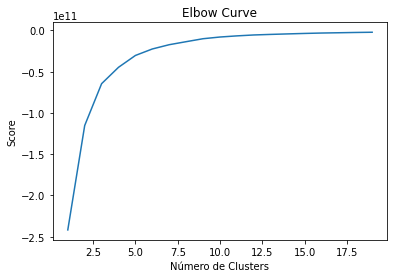

In [ ]:
#Gráfico del codo
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(ANSB_X).score(ANSB_X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

### Métrica del Cluster

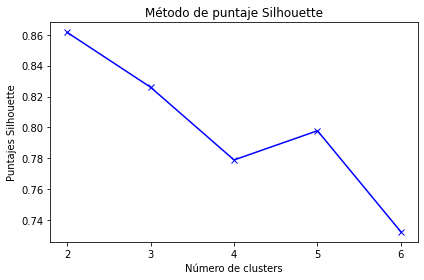

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(ANSB_X)
    silhouette_scores.append(silhouette_score(ANSB_X, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Método de puntaje Silhouette')
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Puntajes Silhouette')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8615984787016195
For n_clusters = 3 The average silhouette_score is : 0.826044563658504
For n_clusters = 4 The average silhouette_score is : 0.7789195745197193
For n_clusters = 5 The average silhouette_score is : 0.797843527545659
For n_clusters = 6 The average silhouette_score is : 0.7386903302779446


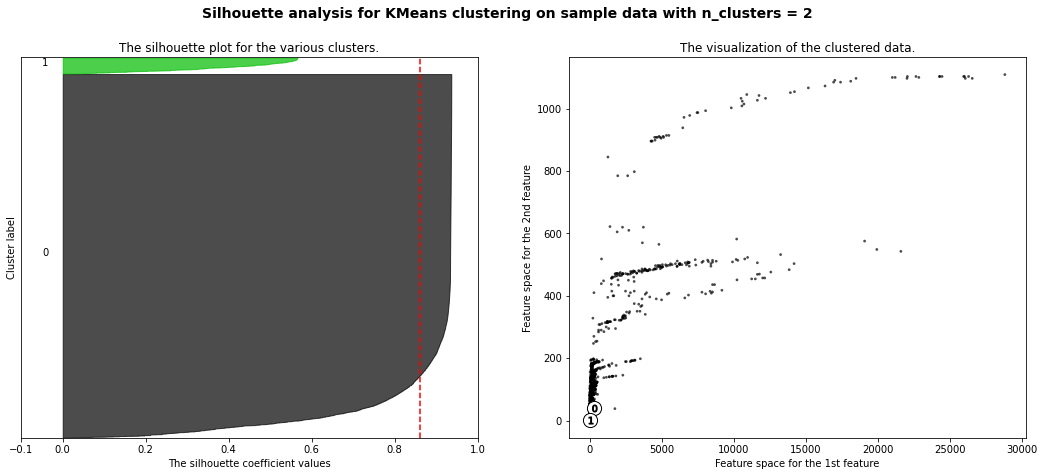

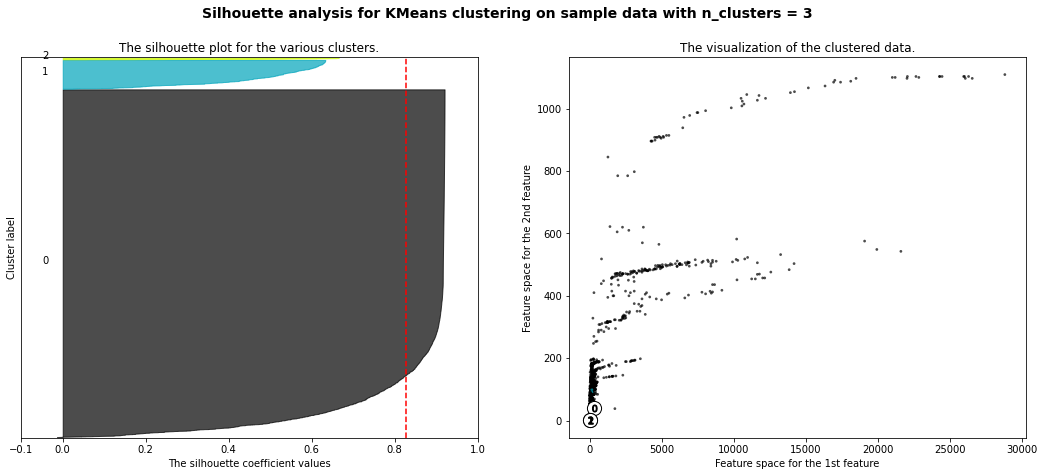

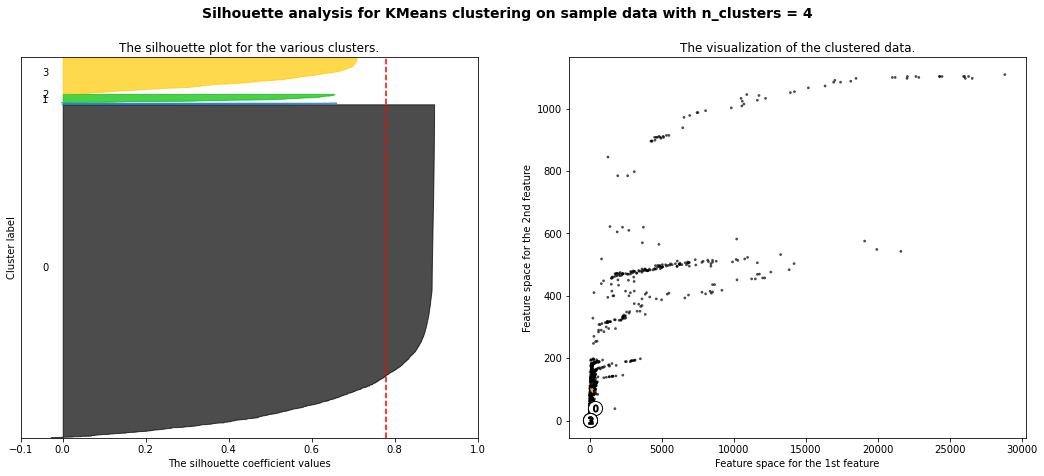

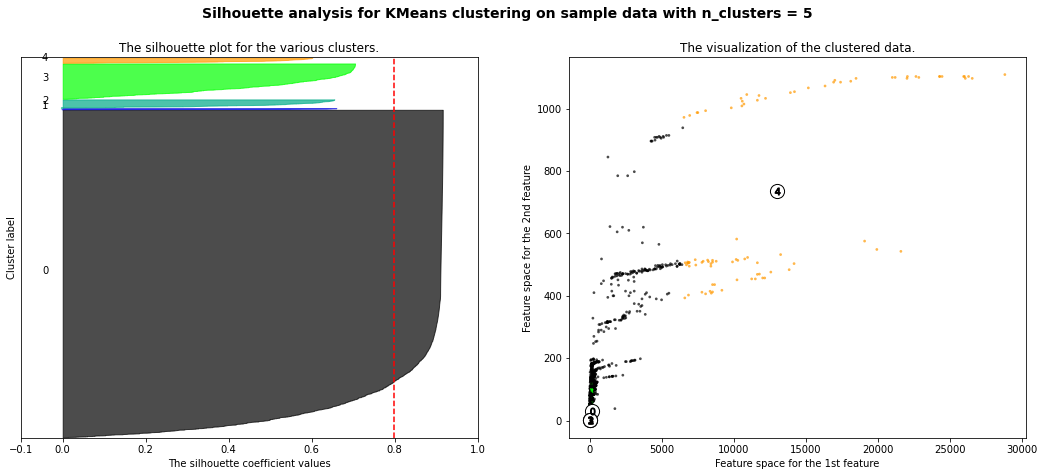

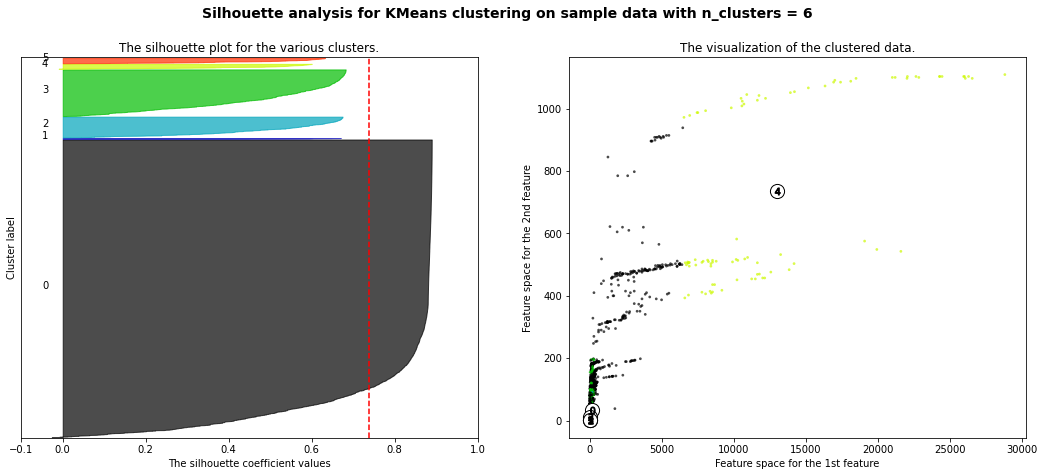

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(ANSB_X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(ANSB_X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(ANSB_X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ANSB_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(ANSB_X[:, 0], ANSB_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
!pip install data-science-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


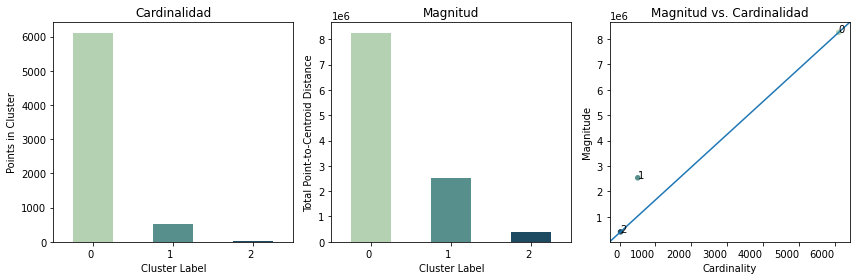

In [ ]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(model.labels_,
                         ax=ax1,
                         title="Cardinalidad",
                         color=cluster_colors
                        )
plot_cluster_magnitude(ANSB_X,
                       model.labels_,
                       model.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitud",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(ANSB_X,
                              model.labels_,
                              model.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:model.n_clusters],
                              ax=ax3, 
                              title="Magnitud vs. Cardinalidad")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

# 4.APRENDIZAJE NO SUPERVISADO (CLASIFICACION BINARIA) - VARIABLE 'FL'

###  4.1 Procesamiento de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

Escalamiento

In [ ]:
bdatosANSMC_Y=bdatosANSB.iloc[:,10]
bdatosANSMC_Y

In [ ]:
bdatosANSMC_X

In [ ]:
#Se rescalan las variables dependendientes entre 0 y 1
from sklearn.preprocessing import  MinMaxScaler #, RobustScaler, Normalizer,
scaler=MinMaxScaler(feature_range=(0,1))
bdatosANSB_X_resc=scaler.fit_transform(bdatosANSB_X)
np.set_printoptions(precision=2)
print(bdatosANSB_X_resc[0:5,:])

In [ ]:
#Estandarizacion para un comportamiento mas Gaussiano
from sklearn.preprocessing import  StandardScaler

scaler=StandardScaler().fit(bdatosANSB_X)
bdatosANSB_X_est=scaler.transform(bdatosANSB_X)

np.set_printoptions(precision=3)
print(bdatosANSB_X_est[0:5,:])

In [ ]:
#Normalizacion 
from sklearn.preprocessing import  Normalizer

scaler=Normalizer().fit(bdatosANSB_X)
bdatosANSB_X_norm=scaler.transform(bdatosANSB_X)

np.set_printoptions(precision=3)
print(bdatosANSB_X_norm[0:5,:])

In [ ]:
#Transformación de Box-Cox
from sklearn.preprocessing import  Normalizer

scaler=Normalizer().fit(bdatosANSB_X)
bdatosANSB_X_norm=scaler.transform(bdatosANSB_X)

np.set_printoptions(precision=3)
print(bdatosANSB_X_norm[0:5,:])

## Validación Cruzada

In [ ]:
 #Validación cruzada con Modelo de regresión logìstica

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


kfold=KFold(n_splits=10,shuffle=True,random_state=1)
model=LogisticRegression(solver='lbfgs',max_iter=1000)
results=cross_val_score(model,bdatosANSB_X,bdatosANSB_Y,cv=kfold)
print(results)
print(f"Accuracy:{results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)")


In [ ]:
 #Validación cruzada con Modelo de Random Forest

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

num_folds=10
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=1)
model=RandomForestRegressor()
result_RF=cross_val_score(model,bdatosANSB_X,bdatosANSB_Y,cv=kfold)
result_RF
print(result_RF)
print(f"Accuracy:{result_RF.mean()*100.0:,.2f}% ({result_RF.std()*100.0:,.2f}%)")

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

result_ridge = cross_validate(Ridge(),bdatosANSB_X,bdatosANSB_Y,return_train_score=True,cv=kfold)
result_ridge
#print(f"Accuracy:{result_ridge.mean()*100.0:,.2f}% ({result_ridge.std()*100.0:,.2f}%)")

In [ ]:
test_scores = result_ridge['test_score']
train_scores = result_ridge['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

In [ ]:
from sklearn.linear_model import Lasso

result_lasso = cross_validate(Lasso(),bdatosANSB_X,bdatosANSB_Y,return_train_score=True,cv=kfold)
result_lasso

## Métrica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

###  Accuracy

In [ ]:
kfold = KFold(n_splits=5)
model = RandomForestClassifier()

result_Acc = cross_val_score(model, bdatosANSB_X,bdatosANSB_Y, cv=kfold, scoring='accuracy')
print(result_Acc)
print(f"Accuracy:{result_Acc.mean()*100.0:,.2f}% ({result_Acc.std()*100.0:,.2f}%)")


[1. 1. 1. 1. 1.]
Accuracy:100.00% (0.00%)


Logarithmic Loss

In [ ]:
result_LL = cross_val_score(model, bdatosANSB_X,bdatosANSB_Y, cv=kfold, scoring='neg_log_loss')
print(result_LL)
print(f"Accuracy:{result_LL.mean()*100.0:,.2f}% ({result_LL.std()*100.0:,.2f}%)")

[-0.006 -0.009 -0.023 -0.006 -0.006]
Accuracy:-1.01% (0.68%)


Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(bdatosANSB_X,bdatosANSB_Y, test_size=0.3)
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred=model.predict(X_train)
y_train_pred
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
matrix_conf = confusion_matrix(y_train, y_train_pred)
print(matrix_conf)

[[2459    0]
 [   0 2189]]


**Reporte de clasificación**

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       1.00      1.00      1.00      2189

    accuracy                           1.00      4648
   macro avg       1.00      1.00      1.00      4648
weighted avg       1.00      1.00      1.00      4648



**Curva ROC**

In [ ]:
from sklearn.metrics import roc_curve

probs=model.predict_proba(X_test)
y_pred_proba = probs[:,1]

## Análisis de componentes principales

In [ ]:
# Reduccion de dimensiones con PCA

from sklearn.decomposition import PCA

#ACP con k=3
k=3

acp=ACP(n_componentes=k)
fit=acp.fit(X_cla)

# Resumen de componentes

C=acp.componentes

print(f"Varianza explicada:{fit.explained_variance_ratio}")
print(f"Componentes:{C}")

df_acp=pd.DataFrame(data=X_transform,columns=['PC1','PC2','PC3'])

In [ ]:
#Analisis de componentes principales
n = len(bdatosANSB_X_resc[1])  # número de features
pca_bdatosANSB = PCA(n_components=n).fit(bdatosANSB_X_resc)
print(pca_bdatosANSB.components_)

In [ ]:
print(bdatosANSB.explained_variance_ratio_)

In [ ]:
#Gráfico de varianza explicada
plt.plot(bdatosANSB.explained_variance_ratio_)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

In [ ]:
#Gráfico de varianza acumulada
plt.plot(np.cumsum(bdatosANSB.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

#  Analisis Cluster

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

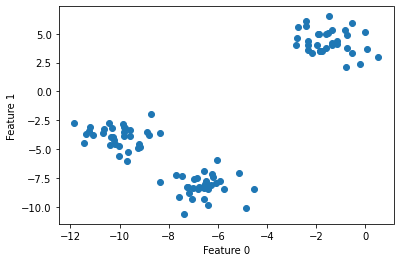

In [ ]:
#Visualización de agrupaciones
X,y=make_blobs(random_state=1)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [ ]:
#KMeans
km = KMeans(n_clusters=3)
model=km.fit(X)
y_kmeans=model.fit_predict(X)

In [ ]:
#Centroides de los cluster
centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[ -6.582  -8.172]
 [ -1.471   4.337]
 [-10.049  -3.86 ]]
número de datos asignados a cada centroide:
[33 34 33]


###  4.3 Análisis estadístico para el problema de aprendizaje  supervisado - Variable 'Concentración'

In [ ]:
bdatosAS

In [ ]:
bdatosAS
bdatosAS_Y=bdatosAS.iloc[:,9]
bdatosAS_Y

In [ ]:
bdatosAS_X=bdatosAS.drop(['C'],axis=1)
bdatosAS_X


,Q,B,y,S,D50,G,Ss,w*,ib
0,0.036,0.305,0.131,2.50,0.105,1.27,2.65,4.159,9.758e-04
1,0.036,0.305,0.140,2.20,0.105,1.27,2.65,3.688,8.652e-04
2,0.028,0.305,0.119,2.30,0.105,1.27,2.65,3.055,7.166e-04
3,0.028,0.305,0.131,1.70,0.105,1.27,2.65,2.189,5.136e-04
4,0.025,0.305,0.119,2.10,0.105,1.27,2.65,2.442,5.728e-04
...,...,...,...,...,...,...,...,...,...
7022,0.030,0.500,0.115,1.80,0.180,3.30,2.65,0.687,2.641e-04
7023,0.030,0.500,0.092,3.50,0.180,3.30,2.65,1.326,5.102e-04
7024,0.030,0.500,0.086,2.07,0.180,3.30,2.65,0.800,3.078e-04
7025,0.018,0.500,0.040,8.00,0.180,3.30,2.65,1.882,7.239e-04


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

**`Error Medio Absoluto - MAE`**

In [ ]:
kfold = KFold(n_splits=5)
model = LinearRegression()
result_MAE= cross_val_score(model, bdatosAS_X, bdatosAS_Y, cv=kfold, scoring='neg_mean_absolute_error')
print(result_MAE)
print(f"Accuracy:{result_MAE.mean()*100.0:,.2f}% ({result_MAE.std()*100.0:,.2f}%)")


[ -2889.807  -5436.362 -11168.799  -4584.252  -2747.806]
Accuracy:-536,540.52% (307,489.92%)


**`Error Medio Cuadrático- MSE**


In [ ]:
result_MSE= cross_val_score(model, bdatosAS_X, bdatosAS_Y, cv=kfold, scoring='neg_mean_squared_error')
print(result_MSE)
print(f"Accuracy:{result_MSE.mean()*100.0:,.2f}% ({result_MSE.std()*100.0:,.2f}%)")

[-1.681e+07 -1.247e+08 -4.322e+10 -3.557e+08 -9.781e+06]
Accuracy:-874,483,464,892.79% (1,723,664,488,674.88%)


**Métrica R²**

In [ ]:
modelo=LinearRegression()
result_R2= cross_val_score(model, bdatosAS_X, bdatosAS_Y, cv=kfold, scoring='r2')
print(result_R2)
print(f"Accuracy:{result_R2.mean()*100.0:,.2f}% ({result_R2.std()*100.0:,.2f}%)")

[ 4.873e-01 -1.996e-01 -1.284e-03 -5.692e+01 -6.068e-01]
Accuracy:-1,144.83% (2,273.92%)
